# Exploratory Data Analysis (EDA)

L'objectif de cette section est d'explorer et comprendre le jeu de données, à travers différentes visualizations et des analyses de corrélations.


## Glossaire:

Indices Généraux <br />
Avoirs officiels de reserve <br />
CHANGE <br />
MONIA <br />
TMP <br />
Inflation <br />
Indices Taux <br />
Indices Sectorielles <br />

In [1]:
!pip install chart-studio
!pip install openpyxl
!pip install pandas==1.5.2

In [2]:
import pandas as pd
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
%matplotlib  inline
import chart_studio.plotly as plt
import plotly.graph_objs as go
from plotly.offline import plot
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot ,iplot
init_notebook_mode(connected=True)
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [3]:
def read_sheets(sheet_name):
    dataset_path = "Dataset.xlsx"
    donnees = pd.read_excel("Dataset.xlsx",sheet_name)
    
    return donnees

In [4]:
donnees = pd.read_excel("Dataset.xlsx")
noms_feuilles = donnees.keys()


In [5]:
IndicesGeneraux = read_sheets("Indices Généraux")
Reserve = read_sheets("Avoirs officiels de réserve")
Change = read_sheets("CHANGE")
Monia = read_sheets("MONIA")
Tmp = read_sheets("TMP")
Inflation = read_sheets("Inlfation")
Taux = read_sheets("Indices Taux")
Sectorielles = read_sheets("Indices Sectorielles")

In [6]:
print("noms des feuilles disponibles",noms_feuilles)

noms des feuilles disponibles Index(['SEANCE', 'INDICE', 'COURS_CLOTURE', 'COURS_PLUS_HAUT',
       'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION'],
      dtype='object')


In [7]:
IndicesGeneraux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEANCE           2366 non-null   object 
 1   INDICE           2366 non-null   object 
 2   COURS_CLOTURE    2366 non-null   float64
 3   COURS_PLUS_HAUT  2366 non-null   float64
 4   COURS_PLUS_BAS   2366 non-null   float64
 5   COURS_OUVERTURE  2366 non-null   float64
 6   COURS_VEILLE     2366 non-null   float64
 7   VARIATION        2366 non-null   float64
dtypes: float64(6), object(2)
memory usage: 148.0+ KB


In [8]:
# Standardisation des noms de colonnes de dates 

IndicesGeneraux = IndicesGeneraux.rename(columns={'SEANCE': 'Date'})
Sectorielles = Sectorielles.rename(columns={'Étiquettes de lignes': 'Date'})
Monia = Monia.rename(columns={'Date de référence': 'Date'})
Tmp = Tmp.rename(columns={'SEANCE': 'Date'})
Inflation = Inflation.rename(columns={'MOIS': 'Date'})
Taux = Taux.rename(columns={'Étiquettes de lignes': 'Date'})
Reserve = Reserve.rename(columns={'DATE': 'Date'})
Change = Change.rename(columns={'DATE_DEXTRACTION':'Date'})

In [9]:
# Changement du format de la date en Year-month-day
#IndicesGeneraux['Date'] = pd.to_datetime(IndicesGeneraux['Date'], format='ISO8601')
#Reserve['Date'] = pd.to_datetime(Reserve['Date'], format='ISO8601')
#Change['Date'] = pd.to_datetime(Change['Date'], format='ISO8601')
#Monia['Date'] = pd.to_datetime(Monia['Date'], format='ISO8601')
#Tmp['Date'] = pd.to_datetime(Tmp['Date'], format='ISO8601')
#Inflation['Date'] = pd.to_datetime(Inflation['Date'], format='ISO8601')
#Taux['Date'] = pd.to_datetime(Taux['Date'], format='ISO8601')
#Sectorielles['Date'] = pd.to_datetime(Sectorielles['Date'], format='ISO8601')


IndicesGeneraux['Date'] = pd.to_datetime(IndicesGeneraux['Date'], format='%Y-%m-%d')
Reserve['Date'] = pd.to_datetime(Reserve['Date'], format='%Y-%m-%d')
Change['Date'] = pd.to_datetime(Change['Date'], format='%Y-%m-%d')
Monia['Date'] = pd.to_datetime(Monia['Date'], format='%Y-%m-%d')
Tmp['Date'] = pd.to_datetime(Tmp['Date'], format='%Y-%m-%d')
Inflation['Date'] = pd.to_datetime(Inflation['Date'], format='%Y-%m-%d')
Taux['Date'] = pd.to_datetime(Taux['Date'], format='%Y-%m-%d')
Sectorielles['Date'] = pd.to_datetime(Sectorielles['Date'], format='%Y-%m-%d')


Après avoir standardisé les données des dates sur les différents dataframes, il est temps de comparer les dates couvertes dans chaque dataframe. Ainsi, on peut comprendre la durée d'enregistrement de chaque donnée.

In [10]:
def print_date_coverage(df):
    """prints the date coverage of each dataframe"""
    print(f'Indices Généraux : début: {df.Date.min()}, fin: {df.Date.max()}')
    print(f'Number of covered days= {(df.Date.max() - df.Date.min()).days} days')
    print("----------------")

In [11]:
# Date coverage

print_date_coverage(IndicesGeneraux)
print_date_coverage(Change)
print_date_coverage(Reserve)
print_date_coverage(Monia)
print_date_coverage(Tmp)
print_date_coverage(Inflation)
print_date_coverage(Taux)
print_date_coverage(Sectorielles)


Indices Généraux : début: 2013-12-06 00:00:00, fin: 2023-12-08 00:00:00
Number of covered days= 3654 days
----------------
Indices Généraux : début: 2021-12-22 00:00:00, fin: 2023-12-08 00:00:00
Number of covered days= 716 days
----------------
Indices Généraux : début: 2020-01-03 00:00:00, fin: 2023-11-24 00:00:00
Number of covered days= 1421 days
----------------
Indices Généraux : début: 2019-12-31 00:00:00, fin: 2023-12-06 00:00:00
Number of covered days= 1436 days
----------------
Indices Généraux : début: 2021-01-01 00:00:00, fin: 2023-12-07 00:00:00
Number of covered days= 1070 days
----------------
Indices Généraux : début: 2022-01-01 00:00:00, fin: 2023-09-01 00:00:00
Number of covered days= 608 days
----------------
Indices Généraux : début: 2020-12-31 00:00:00, fin: 2023-12-08 00:00:00
Number of covered days= 1072 days
----------------
Indices Généraux : début: 2020-12-31 00:00:00, fin: 2023-12-08 00:00:00
Number of covered days= 1072 days
----------------


In [12]:
def highlight_date(df, filler_val=1):
    """returns the start and end date of a dataframe as a range, and a filler vector"""
    start = df.Date.min()
    end = df.Date.max()

    date_range = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    filler_values = [filler_val for i in date_range]
    return date_range, filler_values


In [13]:
# SETTING THE LAYOUT
layout = go.Layout(
    title='étendue des enregistrement de chaque feuille',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
    title='',
    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

########
indices_generaux_date_range, indices_generaux_filler = highlight_date(IndicesGeneraux,1)
taux_date_range, taux_filler = highlight_date(Taux,2)
change_date_range, change_filler = highlight_date(Change,3)
reserve_date_range, reserve_filler = highlight_date(Reserve,4)
monia_date_range, monia_filler = highlight_date(Monia,5)
tmp_date_range, tmp_filler = highlight_date(Tmp,6)
inflation_date_range, inflation_filler = highlight_date(Inflation,7)
sectoriels_date_range, sectoriels_filler = highlight_date(Sectorielles,8)



plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=indices_generaux_date_range, y=indices_generaux_filler, mode='lines', name=' Indices Generaux date range', line=dict(color='red')))
plot.add_trace(go.Scatter(x=taux_date_range, y=taux_filler, mode='lines', name='Taux date range', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=change_date_range, y=change_filler, mode='lines', name='Change date range', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=reserve_date_range, y=reserve_filler, mode='lines', name='Reserve date range', line=dict(color='green')))
plot.add_trace(go.Scatter(x=monia_date_range, y=monia_filler, mode='lines', name='Monia date range', line=dict(color='purple')))
plot.add_trace(go.Scatter(x=tmp_date_range, y=tmp_filler, mode='lines', name='TMP date range', line=dict(color='cyan')))
plot.add_trace(go.Scatter(x=inflation_date_range, y=inflation_filler, mode='lines', name='Inflation date range', line=dict(color='black')))
plot.add_trace(go.Scatter(x=sectoriels_date_range, y=sectoriels_filler, mode='lines', name='Indices sectoriels date range', line=dict(color='orange')))




**Constat:** La table des indices généraux représente la série temporelle qui a la durée d'enregistrement la plus longue. Il s'agit de notre traget, ce qui souligne la possibilité d'augmenter les autres séries pour avoir une dataset plus riche.

### Analyse de la table du taux de change

In [14]:
Change=Change[["Date", "Cours Minimum", "Cours Maximum"]]

In [15]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='Change',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
    title='Cours Minimum et Maximum',
    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Change['Date'], y=Change['Cours Maximum'], mode='lines', name='Change MAX', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Change['Date'], y=Change['Cours Minimum'], mode='lines', name='Change min ', line=dict(color='yellow')))





In [16]:
Change.describe()

Cours Minimum  Cours Maximum
count    1000.000000    1000.000000
mean        9.528560      10.531566
std         0.220119       0.243290
min         9.114000      10.073300
25%         9.388650      10.376925
50%         9.500100      10.500100
75%         9.622050      10.634900
max        10.161900      11.231600

On constate que la distribution de la valeur des changes minimales et maximales suivent la même tendance, sans afficher une saisonalité / periodicité quelquconque sur la durée étudiée.

### Analyse de la table des Reserves

In [17]:
Reserve.tail()

Date  AVOIRS_OFFICIELS_DE_RESERVE  OR_MONETAIRE  \
202 2020-01-31                    250.96000      10.80900   
203 2020-01-24                    250.96800      10.69000   
204 2020-01-17                    251.25869      10.63278   
205 2020-01-10                    251.97100      10.57900   
206 2020-01-03                    253.50100      10.59700   

     MONNAIES_ETRANGERES  DEPOTS_ET_TITRES  POSITION_DE_RESERVE_AU_FMI  \
202              7.86100         223.20800                     1.95400   
203              7.99400         223.18800                     1.95700   
204              8.02958         223.51123                     1.95424   
205              8.01400         224.30200                     1.95200   
206              6.99200         226.80500                     1.95900   

     AVOIRS_EN_DTS  
202        7.12800  
203        7.13900  
204        7.13086  
205        7.12400  
206        7.14800

In [18]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='RESERVE',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Reserve['Date'], y=Reserve['OR_MONETAIRE'], mode='lines', name='OR', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Reserve['Date'], y=Reserve['MONNAIES_ETRANGERES'], mode='lines', name='MONNAIES_ETRANGERES', line=dict(color='red')))


plot.add_trace(go.Scatter(x=Reserve['Date'], y=Reserve['AVOIRS_EN_DTS'], mode='lines', name='AVOIRS_EN_DTS', line=dict(color='black')))



On a choisi de visualizer que trois composantes de la table, en excluant les composante (AVOIRS_OFFICIELS_DE_RESERVE, POSITION_DE_RESERVE_AU_FMI et DEPOTS_ET_TITRES) puisqu'il s'agit pour la premier de la somme de l'ensemble des autres composantes. Pour la deuxième, et la troisème, il s'agit de deux séries qui restent relativement constantes pendant la durée d'enregistrement, comme le montre la table suivante.

un premier constat peut être fait au sujet des reserves des monnaies étrangères, qui semble présenter une tendance periodique: ces reserves montent progressivement en début du mois, pour atteindre un pic vers la moitié de chaque mois, pour redecendre ensuite.

In [19]:
Reserve.describe()

AVOIRS_OFFICIELS_DE_RESERVE  OR_MONETAIRE  MONNAIES_ETRANGERES  \
count                   207.000000    207.000000           207.000000   
mean                    318.721258     12.583768            18.090473   
std                      28.083077      1.070565             5.140158   
min                     247.751000     10.560000             6.992000   
25%                     300.747593     11.672304            15.006020   
50%                     324.153140     12.590958            17.863413   
75%                     338.558395     13.455218            21.087087   
max                     363.692490     14.600335            31.386899   

       DEPOTS_ET_TITRES  POSITION_DE_RESERVE_AU_FMI  AVOIRS_EN_DTS  
count        207.000000                  207.000000     207.000000  
mean         271.568289                    1.957151      14.527534  
std           22.118081                    0.058049       6.034526  
min          218.044000                    1.871077       6.852960  
25%          255.733000                    1.903109       7.510500  
50%          274.850257                    1.957449      18.945310  
75%          284.093164                    1.994542      19.695408  
max          309.361444                    2.076412      20.403429

In [20]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='RESERVE',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Reserve['Date'], y=Reserve['DEPOTS_ET_TITRES'], mode='lines', name='DEPOTS_ET_TITRES', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Reserve['Date'], y=Reserve['AVOIRS_OFFICIELS_DE_RESERVE'], mode='lines', name='Reserve', line=dict(color='blue')))


### Analyse des indicateurs sectoriels

In [21]:
Sectorielles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date                                                   738 non-null    datetime64[ns]
 1   AGROALIMENTAIRE & PRODUCTION                           540 non-null    float64       
 2   ASSURANCES                                             734 non-null    float64       
 3   BANQUES                                                734 non-null    float64       
 4   BATIMENT & MATERIAUX DE CONSTRUCTION                   734 non-null    float64       
 5   BOISSONS                                               734 non-null    float64       
 6   CHIMIE                                                 734 non-null    float64       
 7   DISTRIBUTEURS                                          734 non-null    

In [22]:
Sectorielles.describe()

AGROALIMENTAIRE & PRODUCTION   ASSURANCES       BANQUES  \
count                    540.000000   734.000000    734.000000   
mean                   34084.273548  4857.023167  12900.280973   
std                     3396.943811   379.096811    864.096812   
min                    13969.669922  4037.669922  10631.299805   
25%                    31654.780000  4551.127500  12260.125068   
50%                    34248.830000  4796.824980  12928.485059   
75%                    37257.290000  5102.740015  13563.685000   
max                    40967.130000  5701.540039  14856.370117   

       BATIMENT & MATERIAUX DE CONSTRUCTION      BOISSONS       CHIMIE  \
count                            734.000000    734.000000   734.000000   
mean                           17824.431569  15310.993511  5679.653896   
std                             2257.213484   1203.787140  1081.485709   
min                            12520.940430  12912.080078  3769.370000   
25%                            16545.595098  14354.540039  4654.000000   
50%                            17796.059570  15362.209961  5776.825088   
75%                            19177.592500  16128.440000  6700.882500   
max                            22578.390625  17608.750000  7535.899902   

       DISTRIBUTEURS  ELECTRICITE  EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES  \
count     734.000000   734.000000                               326.000000   
mean    41747.081759  2341.163493                              2638.222272   
std      4562.964323   170.783814                              1741.672768   
min     30901.400000  1970.949951                               897.109985   
25%     39530.000000  2189.940000                               990.784997   
50%     42354.085000  2346.370000                              1051.960022   
75%     44688.608398  2458.100000                              4224.290000   
max     52008.171875  2793.300049                              5714.290000   

       INDUSTRIE PHARMACEUTIQUE  ...  PARTICIPATION ET PROMOTION IMMOBILIERES  \
count                734.000000  ...                               734.000000   
mean                7112.002283  ...                              3336.987002   
std                 1549.369420  ...                               864.087478   
min                 2966.030000  ...                              2213.129883   
25%                 6208.877500  ...                              2611.880000   
50%                 7726.380127  ...                              3261.610107   
75%                 8264.832451  ...                              3751.382446   
max                 9579.780273  ...                              6141.100000   

       PETROLE & GAZ  SERVICES AUX COLLECTIVITES  SERVICES DE TRANSPORT  \
count     734.000000                  503.000000             734.000000   
mean    18204.277080                 1180.606880            3839.034673   
std      2057.785946                  158.851019             396.239921   
min     14934.350000                  891.669983            2784.620117   
25%     16349.850176                 1075.000000            3384.620000   
50%     17618.235313                 1108.329956            3969.615000   
75%     19983.740234                 1333.330000            4153.850098   
max     23639.050781                 1558.130000            4476.919922   

       SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES  \
count                                         734.000000       
mean                                         8103.810908       
std                                           686.981971       
min                                          6668.729980       
25%                                          7513.464985       
50%                                          7967.305000       
75%                                          8639.914961       
max                                          9655.130000       

       SOCIETES DE PLACEMENT IMMOBILIER  SOCIETES DE PORTEF

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\1951747273.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



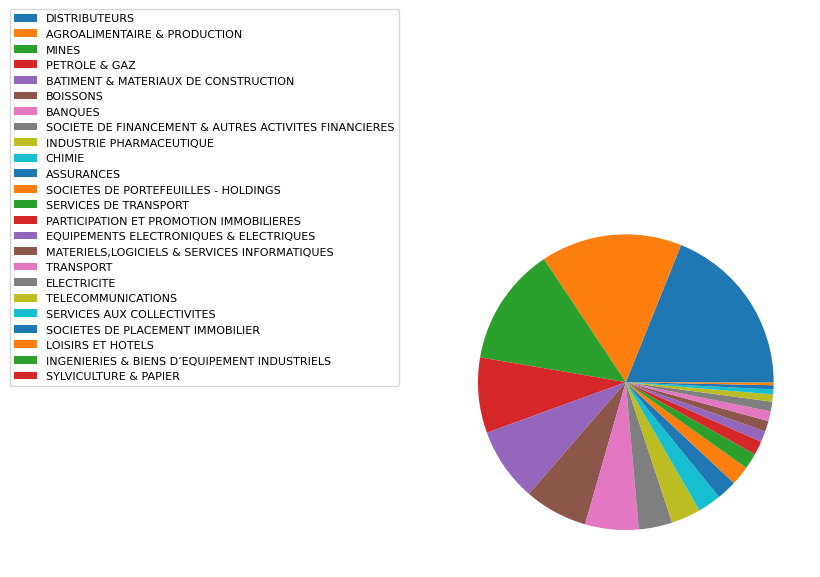

In [23]:
# Calculer les moyennes de chaque colonne
moyenne_colonnes = Sectorielles.mean()

# Trier les colonnes par leur moyenne du plus grand au plus petit
colonnes_triees = moyenne_colonnes.sort_values(ascending=False)

plt.pie(colonnes_triees)
plt.legend( list(colonnes_triees.keys()), loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()
#colonnes_triees.plot.pie()

En termes de volumes, on constate que la contribution par secteur est déséquilibrée, car six secteurs prennent plus des deux tiers des volumes échangés, ce phénomène est expliqué par le manque de pertinance des ces indicateurs comme le souligne cet article du journal Economie Entreprises. <br />
https://economie-entreprises.com/2009/11/03/indices-sectoriels-les-oublies-de-la-bourse/


Pour des raisons de clarté de visualisation, on a choisi regrouper ces indicateurs en fonction de l'échelle de chaqu'une, afin d'éviter d'encombrer le graphe.

In [24]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='Indices Sectoriels',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
    title='Cours Minimum',
    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['MINES'], mode='lines', name='MINES', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['AGROALIMENTAIRE & PRODUCTION'], mode='lines', name='AGROALIMENTAIRE & PRODUCTION', line=dict(color='yellow')))


plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['DISTRIBUTEURS'], mode='lines', name='DISTRIBUTEURS', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['PETROLE & GAZ'], mode='lines', name='PETROLE & GAZ', line=dict(color='green')))



**Costat :** </br>
    - Valeurs manquantes: plusieurs valeurs sont manquantes à ces indicateurs, par exemple, entre le 23 Janvier 2023 et le 30 Janvier 2023. Ce manque peut être expliqué par les actions prises par la bourse de Casablanca pour introduire de nouveau indices regroupant les petites et moyennes capitalisations comme l'indique l'article suivant : https://medias24.com/2023/01/24/la-bourse-de-casablanca-met-en-place-un-nouvel-indice-pour-accompagner-les-pme/ </br>
    - Chute de l'indicateur de l'agroalimentaire et production le 23/02/2022, date correspondant au début du conflit Russo-Ukrenien. </br>

- Ces valeurs manquantes ainsi que ces variations brutales indiquent un besoin de nettoyage de la dataset, en comblant les valeurs manquantes et la correction des outliers.

In [25]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Sectorielles',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
    title='Sectorielles',
    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['BATIMENT & MATERIAUX DE CONSTRUCTION'], mode='lines', name='BATIMENT & MATERIAUX DE CONSTRUCTION', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES'], mode='lines', name='SOCIETE DE FINANCEMENT', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['BANQUES'], mode='lines', name='BANQUES', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['BOISSONS'], mode='lines', name='BOISSONS', line=dict(color='yellow')))



Constat: Présence d'une saisonalité au niveau du secteur des boissons, expliquée par la forte demande en periode estivale. La chute que subit cet indicateur en début octobre est liée au mesures introduites dans le PLF 2024 en terme d'imposition sur les importations comme le montre l'article suivant: https://fr.le360.ma/economie/plf-2024-the-alcool-cigarettes-electroniques-voici-les-principales-nouvelles-mesures-douanieres_NPBMEODY3ZBOXEKYLQTR6B3GZY/
**Important**: l'ensemble des secteurs subissent une baisse progressive qui commence en début 2022, qui est expliquée par la hausse de l'indice d'inflation. Les actions correctives menées par BAM (Bank al Maghrib) notamment en augmentant le taux directeur, ont permis de réduire progressivement l'inflmation, ce qui se traduit en un amélioration progressive de l'état de santé des indicateurs sectoriels.

In [26]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Sectorielles',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['INDUSTRIE PHARMACEUTIQUE'], mode='lines', name='INDUSTRIE PHARMACEUTIQUE', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['CHIMIE'], mode='lines', name='CHIMIE', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['ASSURANCES'], mode='lines', name='ASSURANCES', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SOCIETES DE PORTEFEUILLES - HOLDINGS'], mode='lines', name='SOCIETES DE PORTEFEUILLES - HOLDINGS', line=dict(color='green')))



Une amélioration nette des volumes sur l'indice de l'industrie pharmaceutique est constaté à partir de janvier 2021, il est expliqué par la forte demande sur les médicaments ainsi que la campagne vacinale liée au Covid-19

In [27]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Sectorielles',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SERVICES DE TRANSPORT'], mode='lines', name='SERVICES DE TRANSPORT', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['PARTICIPATION ET PROMOTION IMMOBILIERES'], mode='lines', name='PARTICIPATION ET PROMOTION IMMOBILIERES', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES'], mode='lines', name='EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['MATERIELS,LOGICIELS & SERVICES INFORMATIQUES'], mode='lines', name='MATERIELS,LOGICIELS & SERVICES INFORMATIQUES', line=dict(color='green')))



In [28]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Sectorielles',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['TRANSPORT'], mode='lines', name='TRANSPORT', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['TELECOMMUNICATIONS'], mode='lines', name='TELECOMMUNICATIONS', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['ELECTRICITE'], mode='lines', name='ELECTRICITE', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SERVICES AUX COLLECTIVITES'], mode='lines', name='SERVICES AUX COLLECTIVITES', line=dict(color='green')))




In [29]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Sectorielles',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SOCIETES DE PLACEMENT IMMOBILIER'], mode='lines', name='SOCIETES DE PLACEMENT IMMOBILIER', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['LOISIRS ET HOTELS'], mode='lines', name='LOISIRS ET HOTELS', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS'], mode='lines', name='INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SYLVICULTURE & PAPIER'], mode='lines', name='SYLVICULTURE & PAPIER', line=dict(color='green')))


Données du secteur d'ingénieurie des biens et d'équipements industriels manquants du 19 Avril 2022 au 15 Août 2022, pas d'explication trouvée sur internet

In [30]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='MASI',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=IndicesGeneraux['Date'], y=IndicesGeneraux['COURS_CLOTURE'], mode='lines', name='MASI', line=dict(color='blue')))




In [31]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Sectorielles',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
    title='MASI',
    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['MINES'], mode='lines', name='MINES', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['AGROALIMENTAIRE & PRODUCTION'], mode='lines', name='AGROALIMENTAIRE & PRODUCTION', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['DISTRIBUTEURS'], mode='lines', name='DISTRIBUTEURS', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['PETROLE & GAZ'], mode='lines', name='PETROLE & GAZ', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['BATIMENT & MATERIAUX DE CONSTRUCTION'], mode='lines', name='BATIMENT & MATERIAUX DE CONSTRUCTION', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES'], mode='lines', name='SOCIETE DE FINANCEMENT', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['BANQUES'], mode='lines', name='BANQUES', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['BOISSONS'], mode='lines', name='BOISSONS', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['INDUSTRIE PHARMACEUTIQUE'], mode='lines', name='INDUSTRIE PHARMACEUTIQUE', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['CHIMIE'], mode='lines', name='CHIMIE', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['ASSURANCES'], mode='lines', name='ASSURANCES', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SOCIETES DE PORTEFEUILLES - HOLDINGS'], mode='lines', name='SOCIETES DE PORTEFEUILLES - HOLDINGS', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SERVICES DE TRANSPORT'], mode='lines', name='SERVICES DE TRANSPORT', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['PARTICIPATION ET PROMOTION IMMOBILIERES'], mode='lines', name='PARTICIPATION ET PROMOTION IMMOBILIERES', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES'], mode='lines', name='EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['MATERIELS,LOGICIELS & SERVICES INFORMATIQUES'], mode='lines', name='MATERIELS,LOGICIELS & SERVICES INFORMATIQUES', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['TRANSPORT'], mode='lines', name='TRANSPORT', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['TELECOMMUNICATIONS'], mode='lines', name='TELECOMMUNICATIONS', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['ELECTRICITE'], mode='lines', name='ELECTRICITE', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SERVICES AUX COLLECTIVITES'], mode='lines', name='SERVICES AUX COLLECTIVITES', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SOCIETES DE PLACEMENT IMMOBILIER'], mode='lines', name='SOCIETES DE PLACEMENT IMMOBILIER', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['LOISIRS ET HOTELS'], mode='lines', name='LOISIRS ET HOTELS', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS'], mode='lines', name='INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Sectorielles['Date'], y=Sectorielles['SYLVICULTURE & PAPIER'], mode='lines', name='SYLVICULTURE & PAPIER', line=dict(color='green')))




plot.add_trace(go.Scatter(x=IndicesGeneraux['Date'], y=IndicesGeneraux['COURS_CLOTURE'], mode='lines', name='MASI', line=dict(color='black')))


In [32]:
#sETTING THE LAYOUT
layout = go.Layout(
    title='indices de Taux et MASI',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=IndicesGeneraux['Date'], y=IndicesGeneraux['COURS_CLOTURE'], mode='lines', name='MASI', line=dict(color='black')))

plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 1 AN'], mode='lines', name='Taux 1 ans', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 1 MOIS'], mode='lines', name='Taux 1 MOIS', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 10 ANS'], mode='lines', name='Taux 10 ans', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 15 ANS'], mode='lines', name='Taux 15 ans', line=dict(color='white')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 2 ANS'], mode='lines', name='Taux 2 ans', line=dict(color='purple')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 20 ANS'], mode='lines', name='Taux 20 ans', line=dict(color='grey')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 25 ANS'], mode='lines', name='Taux 25 ans', line=dict(color='yellow')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 30 ANS'], mode='lines', name='Taux 30 ans', line=dict(color='orange')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 5 ANS'], mode='lines', name='Taux 5 ans', line=dict(color='pink')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 6 MOIS'], mode='lines', name='Taux 6 MOIS', line=dict(color='green')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 3 MOIS'], mode='lines', name='Taux 3 MOIS', line=dict(color='red')))
plot.add_trace(go.Scatter(x=Taux['Date'], y=Taux['NOMINAL 3 ANS'], mode='lines', name='Taux 3 ANS', line=dict(color='blue')))


Au niveau des taux, on constate une chute brutale des taux en Janvier 2023, on se demande si cette chute est due au recours du BAM au marché secondaire pour l'achat des bons de trésor. https://fr.le360.ma/economie/pourquoi-bank-al-maghrib-a-achete-pour-la-premiere-fois-des-bons-du-tresor-sur-le-marche-secondaire-273813/

In [33]:
Taux.tail()

Date  NOMINAL 1 AN  NOMINAL 1 MOIS  NOMINAL 10 ANS  NOMINAL 15 ANS  \
733 2023-12-04    154.688147      150.516081      180.951079      187.378003   
734 2023-12-05    154.700456      150.528427      180.967438      187.438017   
735 2023-12-06    154.712768      150.540774      180.983799      187.365278   
736 2023-12-07    154.719686      150.553123      181.000163      187.380845   
737 2023-12-08    154.731984      150.565472      181.016529      187.396416   

     NOMINAL 2 ANS  NOMINAL 20 ANS  NOMINAL 25 ANS  NOMINAL 3 ANS  \
733     158.605222      181.250897      172.619607     161.402799   
734     158.618276      181.423077      172.688189     161.416120   
735     158.609925      181.137082      172.609641     161.454378   
736     158.619452      181.156583      172.629230     161.431237   
737     158.632594      181.176087      172.648823     161.444647   

     NOMINAL 3 MOIS  NOMINAL 30 ANS  NOMINAL 5 ANS  NOMINAL 6 MOIS  
733      150.434981      163.448032     167.366039      151.465377  
734      150.447260      163.406082     167.380655      151.477032  
735      150.459540      163.548869     167.483732      151.488690  
736      150.471821      163.568526     167.409826      151.500354  
737      150.484104      163.588185     167.424449      151.512022

In [34]:
Tmp.head()

Date  TAUX MOYEN PONDERE  VOLUME JJ  ENCOURS
0 2023-12-07                 3.0     2199.0     7769
1 2023-12-06                 3.0     2389.0     7669
2 2023-12-05                 3.0     3022.0     8302
3 2023-12-04                 3.0     4703.0     9833
4 2023-12-03                 3.0        0.0     7999

In [35]:
#sETTING THE LAYOUT
layout = go.Layout(

    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
    title='TMP ET MONIA',
    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)
plot.add_trace(go.Scatter(x=Tmp['Date'], y=Tmp['TAUX MOYEN PONDERE'], mode='lines', name='TMP', line=dict(color='blue')))
plot.add_trace(go.Scatter(x=Monia['Date'], y=Monia['Indice MONIA'], mode='lines', name='MONIA', line=dict(color='red')))



In [36]:
#sETTING THE LAYOUT
layout = go.Layout(
    title=' Evolution de Inflation  avec le Temps',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New ,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(

    titlefont=dict(
    family='Courier New, monospace',
    size=18,
    color='#7f7f7f'
    ))
)

plot=go.Figure(layout=layout)

plot.add_trace(go.Scatter(x=Inflation['Date'], y=Inflation['INFLATION'], mode='lines', name='Inflation', line=dict(color='yellow')))



Au niveau de l'indicateur d'inflation, on constate une montée en flèche à partir de janvier 2022, expliquée par les différentes mesures de stimulation déclenchées par le gouvernement, qui ont eu pour effet l'augmenetation de la liquidité dans le marché, et naturellement par la suite l'augmentation du taux d'inflation. La banque centrale a décidé d'augementer le taux d'intérêt directeur dans le but de diminuer la liqudité dans le marché, et par la suite réduire l'inflation. Cette mesure a fonctionné, mais n'a pas pu remettre l'inflation aux chiffres avant pandémie, car ces mesures restent limitées et qu'ils n'agissent pas sur l'inflation importée au niveau mondial.

# Analyse avec normalisation

Le but de la normalisation est de préparer le terrain pour l'apprentissage du modèle. Il est connu que les modèles à base de réseaux de neurones convergent rapidement lorsque les données sont normalisées.

### 1-Normalisation des TAUX

In [37]:
# Séparez la série temporelle et les autres colonnes
scaler =  StandardScaler()
time_Taux = Taux.iloc[:, 0]
features_Taux = Taux.iloc[:, 1:]
# Appliquez la normalisation sur toutes les colonnes sauf la première
normalized_features = scaler.fit_transform(features_Taux)
# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Taux = pd.DataFrame(normalized_features, columns=features_Taux.columns)
# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Taux.insert(0, 'Date', time_Taux)
normalized_Taux

Date  NOMINAL 1 AN  NOMINAL 1 MOIS  NOMINAL 10 ANS  NOMINAL 15 ANS  \
0   2020-12-31     -1.647714       -1.442728        0.368840        0.421956   
1   2021-01-04     -1.631448       -1.433428        0.372628        0.425473   
2   2021-01-05     -1.628019       -1.431102        0.373869        0.426401   
3   2021-01-06     -1.612302       -1.428777        0.375407        0.358578   
4   2021-01-07     -1.607729       -1.426451        0.376763        0.359517   
..         ...           ...             ...             ...             ...   
733 2023-12-04      2.494419        2.098367       -0.615046       -0.868286   
734 2023-12-05      2.500986        2.103362       -0.613394       -0.864613   
735 2023-12-06      2.507554        2.108357       -0.611742       -0.869065   
736 2023-12-07      2.511245        2.113353       -0.610089       -0.868112   
737 2023-12-08      2.517805        2.118349       -0.608437       -0.867159   

     NOMINAL 2 ANS  NOMINAL 20 ANS  NOMINAL 25 ANS  NOMINAL 3 ANS  \
0        -1.895843        0.412599        0.337991      -1.323382   
1        -1.909824        0.424813        0.344996      -1.310129   
2        -1.904431        0.425600        0.345737      -1.305042   
3        -1.870758        0.356766        0.368432      -1.229667   
4        -1.865403        0.357561        0.369170      -1.232133   
..             ...             ...             ...            ...   
733       2.801331       -1.060821       -1.187255       1.765886   
734       2.810571       -1.052787       -1.184445       1.774065   
735       2.804660       -1.066131       -1.187664       1.797556   
736       2.811404       -1.065221       -1.186861       1.783347   
737       2.820707       -1.064311       -1.186058       1.791581   

     NOMINAL 3 MOIS  NOMINAL 30 ANS  NOMINAL 5 ANS  NOMINAL 6 MOIS  
0         -1.478022        0.364098      -0.114729       -1.514224  
1         -1.468081        0.355362      -0.157602       -1.503533  
2         -1.465587        0.356076      -0.154917       -1.500868  
3         -1.460285        0.369030      -0.192271       -1.494925  
4         -1.458920        0.369743      -0.162735       -1.498731  
..              ...             ...            ...             ...  
733        2.143744       -1.296462       0.213458        2.234551  
734        2.149045       -1.298051       0.217652        2.239923  
735        2.154347       -1.292643       0.247228        2.245297  
736        2.159649       -1.291898       0.226022        2.250673  
737        2.164952       -1.291154       0.230218        2.256051  

[738 rows x 13 columns]

### Normaliser les Indices  Sectorielles

In [38]:
# Séparez la série temporelle et les autres colonnes pour les données Sectorielles
time_Sectorielles = Sectorielles.iloc[:, 0]
features_Sectorielles = Sectorielles.iloc[:, 1:]

#remplacer les valeurs NAN par la valeur precedants
features_Sectorielles = features_Sectorielles.fillna(method='ffill')
# Appliquez la normalisation sur toutes les colonnes sauf la première avec le StandardScaler
normalized_features_secteur = scaler.fit_transform(features_Sectorielles)

# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Sectorielles = pd.DataFrame(normalized_features_secteur, columns=features_Sectorielles.columns)

# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Sectorielles.insert(0, 'Date', time_Sectorielles)

# Affichez la DataFrame normalisée pour les données Sectorielles
normalized_Sectorielles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date                                                   738 non-null    datetime64[ns]
 1   AGROALIMENTAIRE & PRODUCTION                           738 non-null    float64       
 2   ASSURANCES                                             738 non-null    float64       
 3   BANQUES                                                738 non-null    float64       
 4   BATIMENT & MATERIAUX DE CONSTRUCTION                   738 non-null    float64       
 5   BOISSONS                                               738 non-null    float64       
 6   CHIMIE                                                 738 non-null    float64       
 7   DISTRIBUTEURS                                          738 non-null    

### Normalisation Monia

In [39]:
# Séparez la série temporelle et les autres colonnes

time_Monia= Monia.iloc[:, 0]
features_Monia = Monia.iloc[:, 1:]
# Appliquez la normalisation sur toutes les colonnes sauf la première
normalized_features = scaler.fit_transform(features_Monia)
# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Monia = pd.DataFrame(normalized_features, columns=features_Monia.columns)
# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Monia.insert(0, 'Date', time_Monia)
normalized_Monia

Date  Indice MONIA  Volume JJ
0   2023-12-06      1.837712   0.587592
1   2023-12-05      1.894217  -0.716080
2   2023-12-04      1.870245   0.134697
3   2023-12-01      1.808603   1.339005
4   2023-11-30      1.866821  -0.090045
..         ...           ...        ...
980 2020-01-07      0.529528  -0.803930
981 2020-01-06      0.565486   0.151755
982 2020-01-03      0.548363  -0.026503
983 2020-01-02      0.572335  -0.394107
984 2019-12-31      0.616855   0.703161

[985 rows x 3 columns]

### Normalisation Tmp

In [40]:
# Séparez la série temporelle et les autres colonnes

time_Tmp= Tmp.iloc[:, 0]
features_Tmp = Tmp.iloc[:, 1:]
# Appliquez la normalisation sur toutes les colonnes sauf la première
normalized_features = scaler.fit_transform(features_Tmp)
# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Tmp = pd.DataFrame(normalized_features, columns=features_Tmp.columns)
# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Tmp.insert(0, 'Date', time_Tmp)
normalized_Tmp

Date  TAUX MOYEN PONDERE  VOLUME JJ   ENCOURS
0   2023-12-07            1.461077  -0.337481 -0.401287
1   2023-12-06            1.461077  -0.247611 -0.454756
2   2023-12-05            1.461077   0.051800 -0.116297
3   2023-12-04            1.461077   0.846918  0.702313
4   2023-12-03            1.461077  -1.377614 -0.278308
..         ...                 ...        ...       ...
958 2021-01-05           -0.829979   0.698395 -0.428021
959 2021-01-04           -0.829979   1.149166  0.081538
960 2021-01-03           -0.829979        NaN  0.663815
961 2021-01-02           -0.829979        NaN  0.663815
962 2021-01-01           -0.829979        NaN  0.663815

[963 rows x 4 columns]

### Normalisation Reserve

In [41]:

# Séparez la série temporelle et les autres colonnes

time_Reserve= Reserve.iloc[:, 0]
features_Reserve = Reserve.iloc[:, 1:]
# Appliquez la normalisation sur toutes les colonnes sauf la première
normalized_features = scaler.fit_transform(features_Reserve)
# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Reserve = pd.DataFrame(normalized_features, columns=features_Reserve.columns)
# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Reserve.insert(0, 'Date', time_Reserve)
normalized_Reserve

Date  AVOIRS_OFFICIELS_DE_RESERVE  OR_MONETAIRE  \
0   2023-11-24                     1.238784      1.645205   
1   2023-11-17                     1.282148      1.669839   
2   2023-11-10                     1.271517      1.536018   
3   2023-11-03                     1.338416      1.789678   
4   2023-11-02                     1.272352      1.794339   
..         ...                          ...           ...   
202 2020-01-31                    -2.418735     -1.661805   
203 2020-01-24                    -2.418450     -1.773231   
204 2020-01-17                    -2.408073     -1.826809   
205 2020-01-10                    -2.382648     -1.877166   
206 2020-01-03                    -2.328034     -1.860311   

     MONNAIES_ETRANGERES  DEPOTS_ET_TITRES  POSITION_DE_RESERVE_AU_FMI  \
0              -1.450499          1.595002                    0.438655   
1              -1.352193          1.624351                    0.496900   
2              -1.480174          1.647100                    0.495933   
3              -1.503367          1.712842                    0.514126   
4              -1.663281          1.667349                    0.464177   
..                   ...               ...                         ...   
202            -1.994933         -2.191760                   -0.054420   
203            -1.968996         -2.192666                   -0.002614   
204            -1.962057         -2.178017                   -0.050275   
205            -1.965096         -2.142178                   -0.088957   
206            -2.164404         -2.028739                    0.031923   

     AVOIRS_EN_DTS  
0         0.857324  
1         0.862889  
2         0.862796  
3         0.907746  
4         0.902911  
..             ...  
202      -1.229172  
203      -1.227345  
204      -1.228697  
205      -1.229837  
206      -1.225850  

[207 rows x 7 columns]

### Normalisation des Changes

In [42]:

# Séparez la série temporelle et les autres colonnes

time_Change= Change.iloc[:, 0]
features_Change = Change.iloc[:, 1:]
# Appliquez la normalisation sur toutes les colonnes sauf la première
normalized_features = scaler.fit_transform(features_Change)
# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Change = pd.DataFrame(normalized_features, columns=features_Change.columns)
# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Change.insert(0, 'Date', time_Change)
normalized_Change

Date  Cours Minimum  Cours Maximum
0   2023-12-08      -0.285716      -0.285672
1   2023-12-08      -0.307079      -0.307056
2   2023-12-07      -0.274807      -0.274568
3   2023-12-07      -0.275717      -0.275802
4   2023-12-06      -0.308442      -0.308290
..         ...            ...            ...
995 2021-12-24      -1.595206      -1.595463
996 2021-12-23      -1.587479      -1.587238
997 2021-12-23      -1.574752      -1.574901
998 2021-12-22      -1.431577      -1.431791
999 2021-12-22      -1.497483      -1.497589

[1000 rows x 3 columns]

### Normalisattion Inflation

In [43]:


# Séparez la série temporelle et les autres colonnes

time_Inflation= Inflation.iloc[:, 0]
features_Inflation = Inflation.iloc[:, 1:]
# Appliquez la normalisation sur toutes les colonnes sauf la première
normalized_features = scaler.fit_transform(features_Inflation)
# Créez une nouvelle DataFrame avec la série temporelle et les colonnes normalisées
normalized_Inflation = pd.DataFrame(normalized_features, columns=features_Inflation.columns)
# Ajoutez la série temporelle à la DataFrame normalisée
normalized_Inflation.insert(0, 'Date', time_Inflation)
normalized_Inflation

Date  INFLATION  INFLATION_SOUS_JACENTE
0  2023-09-01  -1.024736               -1.410683
1  2023-08-01  -0.969661               -1.211168
2  2023-07-01  -1.024736               -0.945147
3  2023-06-01  -0.694284               -0.812136
4  2023-05-01   0.186920               -0.280095
5  2023-04-01   0.572446                0.517968
6  2023-03-01   0.792747                0.916999
7  2023-02-01   1.839177                1.316030
8  2023-01-01   1.178274                1.249525
9  2022-12-01   0.847822                1.183020
10 2022-11-01   0.847822                0.983504
11 2022-10-01   0.737672                0.717483
12 2022-09-01   0.847822                0.584473
13 2022-08-01   0.680474                0.683573
14 2022-07-01   0.521297                0.736830
15 2022-06-01   0.218132                0.639051
16 2022-05-01  -0.496151                0.129835
17 2022-04-01  -0.486824               -0.685930
18 2022-03-01  -0.824726               -1.145094
19 2022-02-01  -1.733399               -1.424830
20 2022-01-01  -2.016090               -1.743209

 ### Normalisation MASI

In [44]:
# Normalisation min-max pour MASI
IndicesGeneraux_normalized = scaler.fit_transform(IndicesGeneraux[['COURS_CLOTURE']])
IndicesGeneraux[['COURS_CLOTURE_normalized']]=IndicesGeneraux_normalized
IndicesGeneraux

Date INDICE  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
0    2023-12-08   MASI       11885.32         11885.32        11824.97   
1    2023-12-07   MASI       11827.02         11827.02        11757.60   
2    2023-12-06   MASI       11757.60         11792.95        11718.07   
3    2023-12-05   MASI       11759.51         11785.10        11709.49   
4    2023-12-04   MASI       11728.06         11769.43        11702.27   
...         ...    ...            ...              ...             ...   
2361 2013-12-12   MASI        9320.66          9320.66         9241.91   
2362 2013-12-11   MASI        9252.30          9252.30         9194.57   
2363 2013-12-10   MASI        9241.40          9263.15         9196.77   
2364 2013-12-09   MASI        9221.40          9277.00         9199.47   
2365 2013-12-06   MASI        9240.41          9340.03         9240.39   

      COURS_OUVERTURE  COURS_VEILLE  VARIATION  COURS_CLOTURE_normalized  
0            11827.02      11827.02   0.490000                  0.714974  
1            11757.60      11757.60   0.590000                  0.667490  
2            11759.51      11759.51  -0.020000                  0.610949  
3            11728.06      11728.06   0.270000                  0.612504  
4            11748.19      11748.19  -0.170000                  0.586889  
...               ...           ...        ...                       ...  
2361          9241.91       9252.30   0.007388                 -1.373894  
2362          9239.97       9241.40   0.001179                 -1.429572  
2363          9203.46       9221.40   0.002169                 -1.438450  
2364          9235.06       9240.41  -0.002057                 -1.454740  
2365          9310.02       9327.31  -0.009317                 -1.439256  

[2366 rows x 9 columns]

# CALCUL DE CORRELATION

In [45]:


# Exemple de calcul de corrélation entre MASI et les séries de normalized_Taux_Secteur
correlation_masi_normalized = Sectorielles.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION LES INDICES SECTORIELLES ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))


 
 ******LA CORRELATION LES INDICES SECTORIELLES ET LE MASI******

PARTICIPATION ET PROMOTION IMMOBILIERES                  0.659188
TRANSPORT                                                0.649305
BANQUES                                                  0.596070
SOCIETES DE PORTEFEUILLES - HOLDINGS                     0.561302
SERVICES DE TRANSPORT                                    0.558715
LOISIRS ET HOTELS                                        0.522095
BATIMENT & MATERIAUX DE CONSTRUCTION                     0.475424
MINES                                                    0.467199
SERVICES AUX COLLECTIVITES                               0.450701
BOISSONS                                                 0.442023
ASSURANCES                                               0.292978
MATERIELS,LOGICIELS & SERVICES INFORMATIQUES             0.275711
CHIMIE                                                   0.249670
SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES    0.246287
EQUIPEMEN

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\3630338716.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [46]:


# Exemple de calcul de corrélation entre MASI et les séries de normalized_Taux_Secteur
correlation_masi_normalized = normalized_Taux.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION LES INDICES DE  TAUX ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))


 
 ******LA CORRELATION LES INDICES DE  TAUX ET LE MASI******

NOMINAL 30 ANS    0.328251
NOMINAL 2 ANS     0.325314
NOMINAL 1 AN      0.295733
NOMINAL 25 ANS    0.271587
NOMINAL 6 MOIS    0.249541
NOMINAL 20 ANS    0.228334
NOMINAL 3 MOIS    0.227478
NOMINAL 1 MOIS    0.218219
NOMINAL 15 ANS    0.184209
NOMINAL 3 ANS     0.155008
NOMINAL 10 ANS    0.150525
NOMINAL 5 ANS     0.057637
dtype: float64


C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\1188206299.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [47]:
# Exemple de calcul de corrélation entre MASI et les séries de normalized_Taux_Secteur
correlation_masi_normalized = normalized_Monia.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION MONIA ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))

correlation_masi_normalized = normalized_Tmp.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION TMP ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))

correlation_masi_normalized = normalized_Reserve.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION Reserve ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))

correlation_masi_normalized = normalized_Change.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION Change ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))

correlation_masi_normalized = normalized_Inflation.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION Inflation ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))



 
 ******LA CORRELATION MONIA ET LE MASI******

Volume JJ       0.120715
Indice MONIA    0.093681
dtype: float64
 
 ******LA CORRELATION TMP ET LE MASI******

VOLUME JJ             0.100975
ENCOURS               0.086967
TAUX MOYEN PONDERE    0.055094
dtype: float64
 
 ******LA CORRELATION Reserve ET LE MASI******

AVOIRS_EN_DTS                  0.945162
AVOIRS_OFFICIELS_DE_RESERVE    0.823226
DEPOTS_ET_TITRES               0.820201
OR_MONETAIRE                   0.720402
POSITION_DE_RESERVE_AU_FMI     0.543885
MONNAIES_ETRANGERES            0.298450
dtype: float64
 
 ******LA CORRELATION Change ET LE MASI******

Cours Maximum    0.150540
Cours Minimum    0.150533
dtype: float64
 
 ******LA CORRELATION Inflation ET LE MASI******

INFLATION                 0.157956
INFLATION_SOUS_JACENTE    0.052638
dtype: float64


C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\957077526.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\957077526.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\957077526.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\957077526.py:20: FutureWarning:

The default value of numeric_only in DataFram

In [48]:
from sklearn.impute import SimpleImputer

# Séparez la série temporelle et les autres colonnes
time_normalized_Tmp = normalized_Tmp.iloc[:, 0]
features_to_Simple = normalized_Tmp.iloc[:, 1:]

# Supposons que df est votre DataFrame
# Créez un objet SimpleImputer avec la stratégie de la moyenne

features_to_Simple = features_to_Simple.fillna(method='ffill')
# Appliquez la transformation sur le DataFrame
normalized_Tmp = pd.DataFrame(features_to_Simple)
# Ajoutez la série temporelle à la DataFrame Simple
normalized_Tmp.insert(0, 'Date', time_normalized_Tmp)
normalized_Tmp.tail(20)

Date  TAUX MOYEN PONDERE  VOLUME JJ   ENCOURS
943 2021-01-20           -0.829979   0.930166  0.470258
944 2021-01-19           -0.829979   0.930639  0.470792
945 2021-01-18           -0.829979   1.131192  0.376687
946 2021-01-17           -0.829979   1.131192  0.264937
947 2021-01-16           -0.829979   1.131192  0.264937
948 2021-01-15           -0.829979   1.098555  0.264937
949 2021-01-14           -0.829979   0.828943 -0.039836
950 2021-01-13           -0.829979   1.138760  0.310386
951 2021-01-12           -0.829979   1.088149  0.226439
952 2021-01-11           -0.829979   1.088149 -0.033955
953 2021-01-10           -0.829979  -1.377614 -0.033955
954 2021-01-09           -0.829979  -1.377614 -0.033955
955 2021-01-08           -0.829979   0.857797 -0.033955
956 2021-01-07           -0.829979   0.871514 -0.018449
957 2021-01-06           -0.829979   0.753263 -0.365997
958 2021-01-05           -0.829979   0.698395 -0.428021
959 2021-01-04           -0.829979   1.149166  0.081538
960 2021-01-03           -0.829979   1.149166  0.663815
961 2021-01-02           -0.829979   1.149166  0.663815
962 2021-01-01           -0.829979   1.149166  0.663815

In [49]:
normalized_Tmp = normalized_Tmp.replace(0, normalized_Tmp.mean())
correlation_masi_normalized = normalized_Tmp.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION TMP ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))

 
 ******LA CORRELATION TMP ET LE MASI******

VOLUME JJ             0.109503
ENCOURS               0.086967
TAUX MOYEN PONDERE    0.055094
dtype: float64


C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\3651542670.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\3651542670.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [50]:
normalized_Tmp.dtypes

Date                  datetime64[ns]
TAUX MOYEN PONDERE           float64
VOLUME JJ                    float64
ENCOURS                      float64
dtype: object

## Réduction de dimensions avec PCA

In [51]:
from sklearn.decomposition import PCA
import pandas as pd

Tmp_ = normalized_Tmp
time_series1 = Tmp_.iloc[:, 0]

# Sélctionnez les colonnes numériques (supposez que vous avez exclu les colonnes non numériques si nécessaire)
numeric_columns = Tmp_.select_dtypes(include=['float64']).columns
data_for_pca = Tmp_[numeric_columns]

# Initialisez l'objet PCA avec le nombre de composantes principales souhaitées (par exemple, 2)
num_components = 2
pca = PCA(n_components=num_components)

# Appliquez la transformation PCA sur les données
pca_result = pca.fit_transform(data_for_pca)
normalized_Tmp_=pd.DataFrame(np.array(pca_result))
normalized_Tmp_.insert(0,'Date', time_series1)
normalized_Tmp_

Date         0         1
0   2023-12-07 -0.833486  1.106688
1   2023-12-06 -0.800415  1.063481
2   2023-12-05 -0.362971  1.176482
3   2023-12-04  0.747899  1.436675
4   2023-12-03 -1.530373  1.360116
..         ...       ...       ...
958 2021-01-05  0.400716 -1.040003
959 2021-01-04  1.059300 -0.869877
960 2021-01-03  1.428172 -0.580261
961 2021-01-02  1.428172 -0.580261
962 2021-01-01  1.428172 -0.580261

[963 rows x 3 columns]

In [52]:
from sklearn.decomposition import PCA
import pandas as pd

time_series1 = normalized_Taux.iloc[:, 0]

# Sélctionnez les colonnes numériques (supposez que vous avez exclu les colonnes non numériques si nécessaire)
numeric_columns = normalized_Taux.select_dtypes(include=['float64']).columns
data_for_pca = normalized_Taux[numeric_columns]

# Initialisez l'objet PCA avec le nombre de composantes principales souhaitées (par exemple, 2)
num_components = 3
pca = PCA(n_components=num_components)

# Appliquez la transformation PCA sur les données
pca_result = pca.fit_transform(data_for_pca)
normalized_TAUX=pd.DataFrame(np.array(pca_result))
normalized_TAUX.insert(0, 'Date', time_series1)
normalized_TAUX

Date         0         1         2
0   2020-12-31 -2.512322 -2.991836 -0.249636
1   2021-01-04 -2.495831 -2.991682 -0.230430
2   2021-01-05 -2.494622 -2.981926 -0.230242
3   2021-01-06 -2.447692 -2.940057 -0.255587
4   2021-01-07 -2.455106 -2.927234 -0.260047
..         ...       ...       ...       ...
733 2023-12-04  4.435463  4.091013 -0.371651
734 2023-12-05  4.436478  4.108977 -0.369454
735 2023-12-06  4.435934  4.131740 -0.377064
736 2023-12-07  4.448672  4.126130 -0.363622
737 2023-12-08  4.452806  4.142997 -0.362655

[738 rows x 4 columns]

In [53]:
from sklearn.decomposition import PCA
import pandas as pd

time_series1 = normalized_Taux.iloc[:, 0]

# Sélctionnez les colonnes numériques (supposez que vous avez exclu les colonnes non numériques si nécessaire)
numeric_columns = normalized_Taux.select_dtypes(include=['float64']).columns
data_for_pca = normalized_Taux[numeric_columns]

# Initialisez l'objet PCA avec le nombre de composantes principales souhaitées (par exemple, 2)
num_components = 3
pca = PCA(n_components=num_components)

# Appliquez la transformation PCA sur les données
pca_result = pca.fit_transform(data_for_pca)
normalized_TAUX=pd.DataFrame(np.array(pca_result))
normalized_TAUX.insert(0, 'Date', time_series1)

In [54]:

correlation_masi_normalized = normalized_TAUX.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION TAUX ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))


correlation_masi_normalized = normalized_Tmp_.corrwith(IndicesGeneraux['COURS_CLOTURE'])
print(" \n ******LA CORRELATION TMP ET LE MASI******\n")

# Affichez la corrélation pour chaque colonne par rapport à MASI
print(abs(correlation_masi_normalized).sort_values(ascending=False))

 
 ******LA CORRELATION TAUX ET LE MASI******

2    0.645686
0    0.239713
1    0.199899
dtype: float64
 
 ******LA CORRELATION TMP ET LE MASI******

1    0.015697
0    0.012727
dtype: float64


C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\3222784606.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Achraf\AppData\Local\Temp\ipykernel_11528\3222784606.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# prepocessing et nettoyage des données

à travers l'analyse exploratoire, nous avons pu remarquer plusieurs anomalies dans le jeu de données. Notamment plusieurs valeurs manquantes, des outliers et une incohérence des dates de chaque table. Il est alors important de mettre en place une stratégie de preprocessing afin de palier à ces problèmes.

Suite à la contrainte de temps disponible pour aborder ce problème, nous avons décidé de simplifier le traitement en limitant la durée étudiée à la durée couverte par tout les tableaux. Sinon, on aurait pu utiliser des techniques d'augmentation pour ne pas perdre les données hors de la période étudiée.

Pour les valeurs manquantes, on a choisi de les remplacer par les valeurs précédentes ou suivantes afin de ne pas modifier la distribution des données. Il est à noter que plusieurs techniques existent, mais vu la contrainte de temps, on a décidé de simplifier la tâche, tout en étant conscients des implications sur la qualité du modèle par la suite.


In [55]:
start_date = max(IndicesGeneraux['Date'].min(), normalized_Change['Date'].min(), normalized_Reserve['Date'].min(), normalized_Monia['Date'].min()
                 ,normalized_Tmp['Date'].min(),normalized_Inflation['Date'].min(),normalized_Taux['Date'].min(),normalized_Sectorielles['Date'].min())


end_date = min(IndicesGeneraux['Date'].max(), normalized_Change['Date'].max(), normalized_Reserve['Date'].max(), normalized_Monia['Date'].max()
                 ,normalized_Tmp['Date'].max(),normalized_Inflation['Date'].max(),normalized_Taux['Date'].max(),normalized_Sectorielles['Date'].max())

#Identification de la plage de dates commune 
print("start date",start_date)
print("end date",end_date)


start date 2022-01-01 00:00:00
end date 2023-09-01 00:00:00


In [56]:
IndicesGeneraux_filtered = IndicesGeneraux[(IndicesGeneraux['Date'] >= start_date) & (IndicesGeneraux['Date'] <= end_date)]

Change_filtered = normalized_Change[(normalized_Change['Date'] >= start_date) & (normalized_Change['Date'] <= end_date)]

Réserve_filtered = normalized_Reserve[(normalized_Reserve['Date'] >= start_date) & (normalized_Reserve['Date'] <= end_date)]

Tmp_filtered = normalized_Tmp[(normalized_Tmp['Date'] >= start_date) & (normalized_Tmp['Date'] <= end_date)]

Monia_filtered = normalized_Monia[(normalized_Monia['Date'] >= start_date) & (normalized_Monia['Date'] <= end_date)]

Taux_filtered = normalized_Taux[(normalized_Taux['Date'] >= start_date) & (normalized_Taux['Date'] <= end_date)]

Inflation_filtered = normalized_Inflation[(normalized_Inflation['Date'] >= start_date) & (normalized_Inflation['Date'] <= end_date)]

Sectorielles_filtered  = normalized_Sectorielles[(normalized_Sectorielles['Date'] >= start_date) & (normalized_Sectorielles['Date'] <= end_date)]


In [57]:
Sectorielles_filtered.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 250 to 670
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date                                                   421 non-null    datetime64[ns]
 1   AGROALIMENTAIRE & PRODUCTION                           421 non-null    float64       
 2   ASSURANCES                                             421 non-null    float64       
 3   BANQUES                                                421 non-null    float64       
 4   BATIMENT & MATERIAUX DE CONSTRUCTION                   421 non-null    float64       
 5   BOISSONS                                               421 non-null    float64       
 6   CHIMIE                                                 421 non-null    float64       
 7   DISTRIBUTEURS                                          421 non-null  

In [58]:
print(f' Indices Généraux {IndicesGeneraux_filtered.Date.min()}  {IndicesGeneraux_filtered.Date.max()}')
print(f'Total Days= {(IndicesGeneraux_filtered.Date.max() - IndicesGeneraux_filtered.Date.min()).days} days')
print("\n")
print(f'Change {Change_filtered.Date.min()}  {Change_filtered.Date.max()}')
print(f'Total Days= {(Change_filtered.Date.max() - Change_filtered.Date.min()).days} days')
print("\n")

print(f'Réserve {Réserve_filtered.Date.min()}  {Réserve_filtered.Date.max()}')
print(f'Total Days= {(Réserve_filtered.Date.max() - Réserve_filtered.Date.min()).days} days')
print("\n")

print(f' Monia {Monia_filtered.Date.min()}  {Monia_filtered.Date.max()}')
print(f'Total Days= {(Monia_filtered.Date.max() - Monia_filtered.Date.min()).days} days')
print("\n")
print(f' Tmp {Tmp_filtered.Date.min()}  {Tmp_filtered.Date.max()}')
print(f'Total Days= {(Tmp_filtered.Date.max() - Tmp_filtered.Date.min()).days} days')
print("\n")
print(f' Inflation {Inflation_filtered.Date.min()}  {Inflation_filtered.Date.max()}')
print(f'Total Days= {(Inflation_filtered.Date.max() - Inflation_filtered.Date.min()).days} days')
print("\n")
print(f' Taux {Taux_filtered.Date.min()}  {Taux_filtered.Date.max()}')
print(f'Total Days= {(Taux_filtered.Date.max() - Taux_filtered.Date.min()).days} days')
print("\n")
print(f' Sectorielles {Sectorielles_filtered.Date.min()}  {Sectorielles_filtered.Date.max()}')
print(f'Total Days= {(Sectorielles_filtered.Date.max() - Sectorielles_filtered.Date.min()).days} days')
print("\n")


 Indices Généraux 2022-01-03 00:00:00  2023-09-01 00:00:00
Total Days= 606 days


Change 2022-01-03 00:00:00  2023-09-01 00:00:00
Total Days= 606 days


Réserve 2022-01-07 00:00:00  2023-09-01 00:00:00
Total Days= 602 days


 Monia 2022-01-03 00:00:00  2023-09-01 00:00:00
Total Days= 606 days


 Tmp 2022-01-01 00:00:00  2023-09-01 00:00:00
Total Days= 608 days


 Inflation 2022-01-01 00:00:00  2023-09-01 00:00:00
Total Days= 608 days


 Taux 2022-01-03 00:00:00  2023-09-01 00:00:00
Total Days= 606 days


 Sectorielles 2022-01-03 00:00:00  2023-09-01 00:00:00
Total Days= 606 days




In [59]:
start_date = max(IndicesGeneraux['Date'].min(), normalized_Change['Date'].min(), normalized_Reserve['Date'].min(), normalized_Monia['Date'].min()
                 ,normalized_Tmp['Date'].min(),normalized_Inflation['Date'].min(),normalized_Taux['Date'].min(),normalized_Sectorielles['Date'].min())


end_date = min(IndicesGeneraux['Date'].max(), normalized_Change['Date'].max(), normalized_Reserve['Date'].max(), normalized_Monia['Date'].max()
                 ,normalized_Tmp['Date'].max(),normalized_Inflation['Date'].max(),normalized_Taux['Date'].max(),normalized_Sectorielles['Date'].max())

#Identification de la plage de dates commune 
print("start date",start_date)
print("end date",end_date)

start date 2022-01-01 00:00:00
end date 2023-09-01 00:00:00


### ajouter 2 premiers ligne dans les indices de taux

In [60]:
# Ajoutez deux nouvelles lignes avec les dates spécifiées et les valeurs de la première ligne
nouvelles_lignes = pd.DataFrame({'Date': ['2022-01-01 00:00:00', '2022-01-02 00:00:00']})
nouvelles_lignes



Date
0  2022-01-01 00:00:00
1  2022-01-02 00:00:00

In [61]:
# Concaténez les nouvelles lignes avec le DataFrame existant
Taux_filtered = pd.concat([nouvelles_lignes, Taux_filtered], ignore_index=True)
Taux_filtered


Date  NOMINAL 1 AN  NOMINAL 1 MOIS  NOMINAL 10 ANS  \
0    2022-01-01 00:00:00           NaN             NaN             NaN   
1    2022-01-02 00:00:00           NaN             NaN             NaN   
2    2022-01-03 00:00:00     -0.408127       -0.613270        0.901346   
3    2022-01-04 00:00:00     -0.408237       -0.610801        0.930408   
4    2022-01-05 00:00:00     -0.400973       -0.608331        0.931652   
..                   ...           ...             ...             ...   
418  2023-08-28 00:00:00      1.676935        1.608608       -1.037052   
419  2023-08-29 00:00:00      1.683497        1.613663       -1.035381   
420  2023-08-30 00:00:00      1.691527        1.618718       -1.059639   
421  2023-08-31 00:00:00      1.696627        1.623774       -1.032045   
422  2023-09-01 00:00:00      1.703199        1.631258       -1.037878   

     NOMINAL 15 ANS  NOMINAL 2 ANS  NOMINAL 20 ANS  NOMINAL 25 ANS  \
0               NaN            NaN             NaN             NaN   
1               NaN            NaN             NaN             NaN   
2          0.981699       0.173915        0.778300        0.803041   
3          0.982618       0.139121        0.779102        0.803790   
4          0.983538       0.166638        0.779905        0.804539   
..              ...            ...             ...             ...   
418       -1.199113       1.497741       -1.268265       -1.334234   
419       -1.204735       1.507237       -1.274480       -1.335613   
420       -1.181151       1.459462       -1.320157       -1.349144   
421       -1.202573       1.526309       -1.272690       -1.333982   
422       -1.228454       1.535811       -1.318211       -1.347444   

     NOMINAL 3 ANS  NOMINAL 3 MOIS  NOMINAL 30 ANS  NOMINAL 5 ANS  \
0              NaN             NaN             NaN            NaN   
1              NaN             NaN             NaN            NaN   
2         0.783386       -0.600192        0.750121       1.012462   
3         0.731969       -0.597101        0.750851       0.983813   
4         0.776111       -0.594471        0.751581       0.986451   
..             ...             ...             ...            ...   
418       0.435736        1.616628       -1.394545      -0.607525   
419       0.444129        1.621992       -1.391721      -0.603176   
420       0.420525        1.627356       -1.377342      -0.567194   
421       0.460946        1.632721       -1.390221      -0.594503   
422       0.469344        1.644148       -1.375847      -0.590152   

     NOMINAL 6 MOIS  
0               NaN  
1               NaN  
2         -0.563768  
3         -0.557920  
4         -0.554332  
..              ...  
418        1.643012  
419        1.648482  
420        1.657807  
421        1.659406  
422        1.664882  

[423 rows x 13 columns]

In [62]:
Taux_filtered.loc[0]=Taux_filtered.loc[2]
Taux_filtered.loc[1]=Taux_filtered.loc[2]
Taux_filtered

Date  NOMINAL 1 AN  NOMINAL 1 MOIS  NOMINAL 10 ANS  \
0    2022-01-03 00:00:00     -0.408127       -0.613270        0.901346   
1    2022-01-03 00:00:00     -0.408127       -0.613270        0.901346   
2    2022-01-03 00:00:00     -0.408127       -0.613270        0.901346   
3    2022-01-04 00:00:00     -0.408237       -0.610801        0.930408   
4    2022-01-05 00:00:00     -0.400973       -0.608331        0.931652   
..                   ...           ...             ...             ...   
418  2023-08-28 00:00:00      1.676935        1.608608       -1.037052   
419  2023-08-29 00:00:00      1.683497        1.613663       -1.035381   
420  2023-08-30 00:00:00      1.691527        1.618718       -1.059639   
421  2023-08-31 00:00:00      1.696627        1.623774       -1.032045   
422  2023-09-01 00:00:00      1.703199        1.631258       -1.037878   

     NOMINAL 15 ANS  NOMINAL 2 ANS  NOMINAL 20 ANS  NOMINAL 25 ANS  \
0          0.981699       0.173915        0.778300        0.803041   
1          0.981699       0.173915        0.778300        0.803041   
2          0.981699       0.173915        0.778300        0.803041   
3          0.982618       0.139121        0.779102        0.803790   
4          0.983538       0.166638        0.779905        0.804539   
..              ...            ...             ...             ...   
418       -1.199113       1.497741       -1.268265       -1.334234   
419       -1.204735       1.507237       -1.274480       -1.335613   
420       -1.181151       1.459462       -1.320157       -1.349144   
421       -1.202573       1.526309       -1.272690       -1.333982   
422       -1.228454       1.535811       -1.318211       -1.347444   

     NOMINAL 3 ANS  NOMINAL 3 MOIS  NOMINAL 30 ANS  NOMINAL 5 ANS  \
0         0.783386       -0.600192        0.750121       1.012462   
1         0.783386       -0.600192        0.750121       1.012462   
2         0.783386       -0.600192        0.750121       1.012462   
3         0.731969       -0.597101        0.750851       0.983813   
4         0.776111       -0.594471        0.751581       0.986451   
..             ...             ...             ...            ...   
418       0.435736        1.616628       -1.394545      -0.607525   
419       0.444129        1.621992       -1.391721      -0.603176   
420       0.420525        1.627356       -1.377342      -0.567194   
421       0.460946        1.632721       -1.390221      -0.594503   
422       0.469344        1.644148       -1.375847      -0.590152   

     NOMINAL 6 MOIS  
0         -0.563768  
1         -0.563768  
2         -0.563768  
3         -0.557920  
4         -0.554332  
..              ...  
418        1.643012  
419        1.648482  
420        1.657807  
421        1.659406  
422        1.664882  

[423 rows x 13 columns]

In [63]:
# Changez la valeur de la date dans la ligne spécifiée
Taux_filtered.loc[0, 'Date'] = '2022-01-01 00:00:00'
Taux_filtered.loc[1, 'Date'] = '2022-01-02 00:00:00'

Taux_filtered['Date'] = pd.to_datetime(Taux_filtered['Date'], format='%Y-%m-%d')

Taux_filtered

Date  NOMINAL 1 AN  NOMINAL 1 MOIS  NOMINAL 10 ANS  NOMINAL 15 ANS  \
0   2022-01-01     -0.408127       -0.613270        0.901346        0.981699   
1   2022-01-02     -0.408127       -0.613270        0.901346        0.981699   
2   2022-01-03     -0.408127       -0.613270        0.901346        0.981699   
3   2022-01-04     -0.408237       -0.610801        0.930408        0.982618   
4   2022-01-05     -0.400973       -0.608331        0.931652        0.983538   
..         ...           ...             ...             ...             ...   
418 2023-08-28      1.676935        1.608608       -1.037052       -1.199113   
419 2023-08-29      1.683497        1.613663       -1.035381       -1.204735   
420 2023-08-30      1.691527        1.618718       -1.059639       -1.181151   
421 2023-08-31      1.696627        1.623774       -1.032045       -1.202573   
422 2023-09-01      1.703199        1.631258       -1.037878       -1.228454   

     NOMINAL 2 ANS  NOMINAL 20 ANS  NOMINAL 25 ANS  NOMINAL 3 ANS  \
0         0.173915        0.778300        0.803041       0.783386   
1         0.173915        0.778300        0.803041       0.783386   
2         0.173915        0.778300        0.803041       0.783386   
3         0.139121        0.779102        0.803790       0.731969   
4         0.166638        0.779905        0.804539       0.776111   
..             ...             ...             ...            ...   
418       1.497741       -1.268265       -1.334234       0.435736   
419       1.507237       -1.274480       -1.335613       0.444129   
420       1.459462       -1.320157       -1.349144       0.420525   
421       1.526309       -1.272690       -1.333982       0.460946   
422       1.535811       -1.318211       -1.347444       0.469344   

     NOMINAL 3 MOIS  NOMINAL 30 ANS  NOMINAL 5 ANS  NOMINAL 6 MOIS  
0         -0.600192        0.750121       1.012462       -0.563768  
1         -0.600192        0.750121       1.012462       -0.563768  
2         -0.600192        0.750121       1.012462       -0.563768  
3         -0.597101        0.750851       0.983813       -0.557920  
4         -0.594471        0.751581       0.986451       -0.554332  
..              ...             ...            ...             ...  
418        1.616628       -1.394545      -0.607525        1.643012  
419        1.621992       -1.391721      -0.603176        1.648482  
420        1.627356       -1.377342      -0.567194        1.657807  
421        1.632721       -1.390221      -0.594503        1.659406  
422        1.644148       -1.375847      -0.590152        1.664882  

[423 rows x 13 columns]

In [64]:
# Ajoutez deux nouvelles lignes avec les dates spécifiées et les valeurs de la première ligne
nouvelles_lignes = pd.DataFrame({'Date': ['2022-01-01 00:00:00', '2022-01-02 00:00:00']})

# Concaténez les nouvelles lignes avec le DataFrame existant
Sectorielles_filtered = pd.concat([nouvelles_lignes, Sectorielles_filtered], ignore_index=True)

Sectorielles_filtered.loc[0]=Sectorielles_filtered.loc[2]
Sectorielles_filtered.loc[1]=Sectorielles_filtered.loc[2]
# Changez la valeur de la date dans la ligne spécifiée
Sectorielles_filtered.loc[0, 'Date'] = '2022-01-01'
Sectorielles_filtered.loc[1, 'Date'] = '2022-01-02'

Sectorielles_filtered['Date'] = pd.to_datetime(Sectorielles_filtered['Date'], format='%Y-%m-%d')

Sectorielles_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date                                                   423 non-null    datetime64[ns]
 1   AGROALIMENTAIRE & PRODUCTION                           423 non-null    float64       
 2   ASSURANCES                                             423 non-null    float64       
 3   BANQUES                                                423 non-null    float64       
 4   BATIMENT & MATERIAUX DE CONSTRUCTION                   423 non-null    float64       
 5   BOISSONS                                               423 non-null    float64       
 6   CHIMIE                                                 423 non-null    float64       
 7   DISTRIBUTEURS                                          423 non-null    

In [65]:
# Ajoutez deux nouvelles lignes avec les dates spécifiées et les valeurs de la première ligne
nouvelles_lignes = pd.DataFrame({'Date': ['2022-01-01 00:00:00', '2022-01-02 00:00:00']})

# Concaténez les nouvelles lignes avec le DataFrame existant
Monia_filtered = pd.concat([nouvelles_lignes, Monia_filtered], ignore_index=True)

Monia_filtered.loc[0]=Monia_filtered.loc[2]
Monia_filtered.loc[1]=Monia_filtered.loc[2]
# Changez la valeur de la date dans la ligne spécifiée
Monia_filtered.loc[0, 'Date'] = '2022-01-01'
Monia_filtered.loc[1, 'Date'] = '2022-01-02'

Monia_filtered['Date'] = pd.to_datetime(Monia_filtered['Date'], format='%Y-%m-%d')
Monia_filtered



Date  Indice MONIA  Volume JJ
0   2022-01-01      1.842849   0.354321
1   2022-01-02      1.842849   0.354321
2   2023-09-01      1.842849   0.354321
3   2023-08-31      1.870245   1.189319
4   2023-08-30      1.839424   0.441318
..         ...           ...        ...
418 2022-01-07     -0.739273  -0.271288
419 2022-01-06     -0.747835   0.224252
420 2022-01-05     -0.739273  -0.252524
421 2022-01-04     -0.742698  -0.407327
422 2022-01-03     -0.732424  -0.365961

[423 rows x 3 columns]

In [66]:
# Ajoutez deux nouvelles lignes avec les dates spécifiées et les valeurs de la première ligne
nouvelles_lignes = pd.DataFrame({'Date': ['2022-01-01 00:00:00', '2022-01-02 00:00:00']})
# Supprimer la deuxième colonne (index 1) du DataFrame
IndicesGeneraux_filtered = IndicesGeneraux_filtered.drop(IndicesGeneraux_filtered.columns[1], axis=1)



# Concaténez les nouvelles lignes avec le DataFrame existant
IndicesGeneraux_filtered = pd.concat([nouvelles_lignes, IndicesGeneraux_filtered], ignore_index=True)

IndicesGeneraux_filtered.loc[0]=IndicesGeneraux_filtered.loc[2]
IndicesGeneraux_filtered.loc[1]=IndicesGeneraux_filtered.loc[2]
# Changez la valeur de la date dans la ligne spécifiée
IndicesGeneraux_filtered.loc[0, 'Date'] = '2022-01-01'
IndicesGeneraux_filtered.loc[1, 'Date'] = '2022-01-02'

IndicesGeneraux_filtered['Date'] = pd.to_datetime(IndicesGeneraux_filtered['Date'], format='%Y-%m-%d')

IndicesGeneraux_filtered = IndicesGeneraux_filtered.sort_values(by='Date')
IndicesGeneraux_filtered

Date  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
0   2022-01-01       11886.92         11968.68        11886.92   
1   2022-01-02       11886.92         11968.68        11886.92   
416 2022-01-03       13296.29         13363.06        13277.80   
415 2022-01-04       13278.48         13328.50        13278.48   
414 2022-01-05       13290.63         13306.00        13269.36   
..         ...            ...              ...             ...   
6   2023-08-28       11863.66         11921.23        11857.91   
5   2023-08-29       11899.92         11907.98        11841.16   
4   2023-08-30       11903.46         11938.75        11869.76   
3   2023-08-31       11954.29         11988.17        11903.46   
2   2023-09-01       11886.92         11968.68        11886.92   

     COURS_OUVERTURE  COURS_VEILLE  VARIATION  COURS_CLOTURE_normalized  
0           11954.29      11954.29      -0.56                  0.716277  
1           11954.29      11954.29      -0.56                  0.716277  
416         13358.32      13358.32      -0.46                  1.864183  
415         13296.29      13296.29      -0.13                  1.849677  
414         13278.48      13278.48       0.09                  1.859573  
..               ...           ...        ...                       ...  
6           11898.62      11898.62      -0.29                  0.697332  
5           11863.66      11863.66       0.31                  0.726866  
4           11899.92      11899.92       0.03                  0.729749  
3           11903.46      11903.46       0.43                  0.771149  
2           11954.29      11954.29      -0.56                  0.716277  

[417 rows x 8 columns]

In [67]:
import pandas as pd


# Comparez les colonnes de dates entre les deux DataFrames
diff_dates_indices = IndicesGeneraux_filtered[~IndicesGeneraux_filtered['Date'].isin(Taux_filtered['Date'])]
diff_dates_taux = Taux_filtered[~Taux_filtered['Date'].isin(IndicesGeneraux_filtered['Date'])]

# Affichez les valeurs qui diffèrent
print("Dates présentes dans IndicesGénéraux_filtered mais absentes dans Taux_filtered:")
print(diff_dates_indices['Date'])

print("\nDates présentes dans Taux_filtered mais absentes dans IndicesGénéraux_filtered:")
print(diff_dates_taux['Date'])


Dates présentes dans IndicesGénéraux_filtered mais absentes dans Taux_filtered:
Series([], Name: Date, dtype: datetime64[ns])

Dates présentes dans Taux_filtered mais absentes dans IndicesGénéraux_filtered:
38    2022-02-23
39    2022-02-24
43    2022-03-02
56    2022-03-21
57    2022-03-22
298   2023-03-02
Name: Date, dtype: datetime64[ns]


In [68]:
# Identifiez les dates présentes dans Taux_filtered mais absentes dans IndicesGénéraux_filtered
dates_absentes = Taux_filtered['Date'][~Taux_filtered['Date'].isin(IndicesGeneraux_filtered['Date'])]

# Concaténez les dates absentes avec la colonne 'Date' de IndicesGénéraux_filtered
IndicesGeneraux_filtered = pd.concat([IndicesGeneraux_filtered, pd.DataFrame({'Date': dates_absentes})], ignore_index=True)

# Triez le DataFrame par la colonne 'Date' si nécessaire
IndicesGeneraux_filtered = IndicesGeneraux_filtered.sort_values(by='Date').reset_index(drop=True)

# Affichez le résultat
IndicesGeneraux_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      423 non-null    datetime64[ns]
 1   COURS_CLOTURE             417 non-null    float64       
 2   COURS_PLUS_HAUT           417 non-null    float64       
 3   COURS_PLUS_BAS            417 non-null    float64       
 4   COURS_OUVERTURE           417 non-null    float64       
 5   COURS_VEILLE              417 non-null    float64       
 6   VARIATION                 417 non-null    float64       
 7   COURS_CLOTURE_normalized  417 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 26.6 KB


In [69]:
IndicesGeneraux_filtered.loc[38]=IndicesGeneraux_filtered.loc[37]
IndicesGeneraux_filtered.loc[39]=IndicesGeneraux_filtered.loc[37]
IndicesGeneraux_filtered.loc[43]=IndicesGeneraux_filtered.loc[42]
IndicesGeneraux_filtered.loc[56]=IndicesGeneraux_filtered.loc[55]
IndicesGeneraux_filtered.loc[57]=IndicesGeneraux_filtered.loc[55]
IndicesGeneraux_filtered.loc[298]=IndicesGeneraux_filtered.loc[297]
# Changez la valeur de la date dans la ligne spécifiée
IndicesGeneraux_filtered.loc[38, 'Date'] = '2022-02-23'
IndicesGeneraux_filtered.loc[39, 'Date'] = '2022-02-24'
IndicesGeneraux_filtered.loc[43, 'Date'] = '2022-03-02'
IndicesGeneraux_filtered.loc[56, 'Date'] = '2022-03-21'
IndicesGeneraux_filtered.loc[57, 'Date'] = '2022-03-22'
IndicesGeneraux_filtered.loc[298, 'Date'] = '2023-03-02'

IndicesGeneraux_filtered['Date'] = pd.to_datetime(IndicesGeneraux_filtered['Date'], format='%Y-%m-%d')

IndicesGeneraux_filtered = IndicesGeneraux_filtered.sort_values(by='Date')


In [70]:
IndicesGeneraux_filtered

Date  COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  \
0   2022-01-01       11886.92         11968.68        11886.92   
1   2022-01-02       11886.92         11968.68        11886.92   
2   2022-01-03       13296.29         13363.06        13277.80   
3   2022-01-04       13278.48         13328.50        13278.48   
4   2022-01-05       13290.63         13306.00        13269.36   
..         ...            ...              ...             ...   
418 2023-08-28       11863.66         11921.23        11857.91   
419 2023-08-29       11899.92         11907.98        11841.16   
420 2023-08-30       11903.46         11938.75        11869.76   
421 2023-08-31       11954.29         11988.17        11903.46   
422 2023-09-01       11886.92         11968.68        11886.92   

     COURS_OUVERTURE  COURS_VEILLE  VARIATION  COURS_CLOTURE_normalized  
0           11954.29      11954.29      -0.56                  0.716277  
1           11954.29      11954.29      -0.56                  0.716277  
2           13358.32      13358.32      -0.46                  1.864183  
3           13296.29      13296.29      -0.13                  1.849677  
4           13278.48      13278.48       0.09                  1.859573  
..               ...           ...        ...                       ...  
418         11898.62      11898.62      -0.29                  0.697332  
419         11863.66      11863.66       0.31                  0.726866  
420         11899.92      11899.92       0.03                  0.729749  
421         11903.46      11903.46       0.43                  0.771149  
422         11954.29      11954.29      -0.56                  0.716277  

[423 rows x 8 columns]

In [71]:
# Effectuez une fusion externe (outer join) pour obtenir toutes les dates
merged_data = pd.merge(IndicesGeneraux_filtered, Taux_filtered, on='Date', how='outer')

# Affichez le résultat
merged_data=pd.merge(merged_data, Monia_filtered, on='Date', how='outer')
merged_data=pd.merge(Sectorielles_filtered,merged_data,on='Date',how='outer')
merged_data=merged_data.sort_values(by='Date').reset_index(drop=True)
merged_data=pd.merge(merged_data,Tmp_filtered,on='Date',how='inner')

In [72]:
merged_data

Date  AGROALIMENTAIRE & PRODUCTION  ASSURANCES   BANQUES  \
0   2022-01-01                      0.884836    1.717088  1.230052   
1   2022-01-02                      0.884836    1.717088  1.230052   
2   2022-01-03                      0.884836    1.717088  1.230052   
3   2022-01-04                      0.891820    1.538272  1.202772   
4   2022-01-05                      1.049449    1.598253  1.242040   
..         ...                           ...         ...       ...   
419 2023-08-28                     -0.892708   -0.109058  0.312269   
420 2023-08-29                     -0.845459    0.052796  0.397080   
421 2023-08-30                     -0.870109    0.335321  0.288752   
422 2023-08-31                     -0.847561    0.353305  0.605693   
423 2023-09-01                     -0.780261    0.192944  0.451054   

     BATIMENT & MATERIAUX DE CONSTRUCTION  BOISSONS    CHIMIE  DISTRIBUTEURS  \
0                                1.575013  0.605554  0.752228       1.341093   
1                                1.575013  0.605554  0.752228       1.341093   
2                                1.575013  0.605554  0.752228       1.341093   
3                                1.575829  0.605554  0.680396       1.375659   
4                                1.523702  0.638498  0.743343       1.297246   
..                                    ...       ...       ...            ...   
419                             -0.328913  1.694786 -0.746243       0.609171   
420                             -0.322735  1.733781 -0.827702       0.584066   
421                             -0.205990  1.733781 -0.791411       0.422010   
422                             -0.314946  1.733781 -0.872129       0.279120   
423                             -0.448288  1.413924 -0.839355       0.247470   

     ELECTRICITE  EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES  ...  NOMINAL 3 ANS  \
0       0.074744                                -0.505604  ...       0.783386   
1       0.074744                                -0.505604  ...       0.783386   
2       0.074744                                -0.505604  ...       0.783386   
3       0.074744                                -0.508595  ...       0.731969   
4       0.690439                                -0.509568  ...       0.776111   
..           ...                                      ...  ...            ...   
419     0.690439                                -0.515260  ...       0.435736   
420     0.690439                                -0.515260  ...       0.444129   
421     0.952415                                -0.515260  ...       0.420525   
422     0.952415                                -0.515260  ...       0.460946   
423     0.690439                                -0.515260  ...       0.469344   

     NOMINAL 3 MOIS  NOMINAL 30 ANS  NOMINAL 5 ANS  NOMINAL 6 MOIS  \
0         -0.600192        0.750121       1.012462       -0.563768   
1         -0.600192        0.750121       1.012462       -0.563768   
2         -0.600192        0.750121       1.012462       -0.563768   
3         -0.597101        0.750851       0.983813       -0.557920   
4         -0.594471        0.751581       0.986451       -0.554332   
..              ...             ...            ...             ...   
419        1.616628       -1.394545      -0.607525        1.643012   
420        1.621992       -1.391721      -0.603176        1.648482   
421        1.627356       -1.377342      -0.567194        1.657807   
422        1.632721       -1.390221      -0.594503        1.659406   
423        1.644148       -1.375847      -0.590152        1.664882   

     Indice MONIA  Volume JJ  TAUX MOYEN PONDERE  VOLUME JJ   ENCOURS  
0        1.842849   0.354321           -0.829979  -1.377614  0.046783  
1        1.842849   0.354321           -0.829979  -1.377614  0.046783  
2       -0.732424  -0.365961           -0.829979   0.157280 -0.713546  
3       -0.742698  -0.407327           -0.829979  -0.122738 -1.147714  
4       -0.739273  -0.252524      

# Modélisation

In [73]:
!pip install  prophet

In [74]:
from prophet import Prophet
import sklearn as sk

m = Prophet()

In [75]:
copy_merged_data = merged_data.copy()

In [76]:
copy_merged_data = copy_merged_data.rename(columns = {'Date': 'ds', 'VARIATION':'y'})

In [77]:
X_train = copy_merged_data[:300]
X_val = copy_merged_data[300:375]
X_test = copy_merged_data[375:]

In [78]:
m.fit(X_train)

00:56:34 - cmdstanpy - INFO - Chain [1] start processing
00:56:34 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
predictions = m.predict(X_val)['yhat']
predictions

0    -0.017505
1    -0.031937
2     0.011689
3    -0.022548
4    -0.070505
        ...   
70    0.027533
71   -0.006704
72   -0.054661
73   -0.000529
74   -0.014961
Name: yhat, Length: 75, dtype: float64

In [80]:
predictions.describe()

count    75.000000
mean     -0.017820
std       0.027226
min      -0.070505
25%      -0.027976
50%      -0.015241
75%      -0.004490
max       0.027533
Name: yhat, dtype: float64

In [81]:
gt = X_val['y']
gt

300   -0.51
301   -0.64
302   -0.38
303   -0.10
304   -0.33
       ... 
370    0.14
371    1.26
372    1.69
373    0.59
374   -0.42
Name: y, Length: 75, dtype: float64

In [82]:
mean_squared_error(gt, predictions)

0.35325437442749297

In [83]:
from prophet import Prophet
import sklearn as sk

m = Prophet()
copy_merged_data = merged_data.copy()
copy_merged_data = copy_merged_data.rename(columns = {'Date': 'ds', 'VARIATION':'y'})

X_train = copy_merged_data[:300]
X_val = copy_merged_data[300:375]
X_test = copy_merged_data[375:]
m.fit(X_train)
predictions = m.predict(X_val)['yhat']
predictions
gt = X_val['y']
gt
mean_squared_error(gt, predictions)

00:56:34 - cmdstanpy - INFO - Chain [1] start processing
00:56:34 - cmdstanpy - INFO - Chain [1] done processing


0.35325437442749297

C:\Users\Achraf\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Achraf\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Achraf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



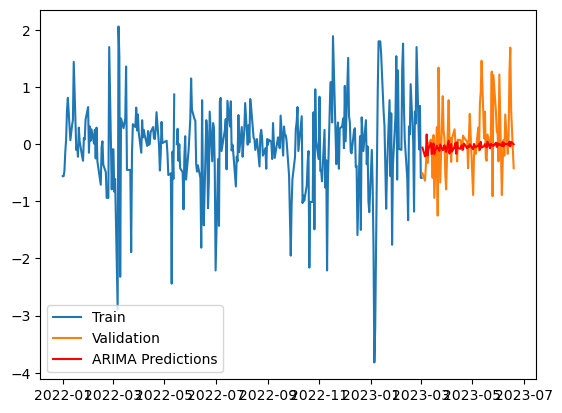

Mean Squared Error (ARIMA): 0.3426846391935219


In [100]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fit du modèle ARIMA
order = (11, 2,7)  
model = ARIMA(X_train['y'], order=order)
arima_results = model.fit()

# Prédictions sur l'ensemble de validation
start = X_val.index.min()
end = X_val.index.max()
predictions_arima = arima_results.predict(start=start, end=end, dynamic=False, typ='levels')

# Affichage des prédictions
plt.plot(X_train['ds'], X_train['y'], label='Train')
plt.plot(X_val['ds'], X_val['y'], label='Validation')
plt.plot(X_val['ds'], predictions_arima, label='ARIMA Predictions', color='red')
plt.legend()
plt.show()

# Calcul de l'erreur quadratique moyenne (MSE)
mse_arima = mean_squared_error(X_val['y'], predictions_arima)
print(f'Mean Squared Error (ARIMA): {mse_arima}')
